# Object Detection Demo
Welcome to the object detection inference walkthrough!  This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image. Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/installation.md) before you start.

# Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
import matplotlib
from PIL import Image

## Env setup

In [2]:
# This is needed to display the images.
#matplotlib.use('TkAgg')
#%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
#sys.path.append("..")

## Object detection imports
Here are the imports from the object detection module.

In [3]:
from utils import label_map_util

from utils import visualization_utils as vis_util

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [4]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
CKPT = 'Result/final/frozen_inference_graph.pb'

#CKPT = 'resnet-udacity-sim-large-10-regions/frozen_inference_graph.pb'
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'TFRecord/label_map_2.pbtxt'
#PATH_TO_LABELS = 'resnet-udacity-sim-large-10-regions/label_map.pbtxt'

NUM_CLASSES = 3
#NUM_CLASSES = 14

## Load a (frozen) Tensorflow model into memory.

In [5]:
detection_graph = tf.Graph()

with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [6]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'green'}, 2: {'id': 2, 'name': 'yellow'}, 3: {'id': 3, 'name': 'red'}}


## Helper code

In [7]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [8]:
from glob import glob

In [9]:
 
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_img'

print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

test_img\*.jpg
Length of test images: 28


Time in milliseconds 8139.7645473480225


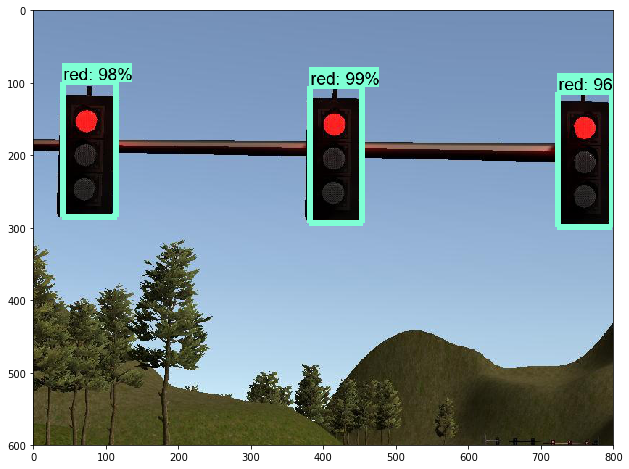

Classes:
[ 3.  3.  3.  2.  1.  3.  2.  2.  2.  2.]
Scores:
[ 0.99426538  0.98820961  0.96932811  0.00965434  0.00525146  0.00473436
  0.00336038  0.00311905  0.00206702  0.00200412]
Boxes:
[[ 0.17629202  0.47691211  0.48943526  0.5683561 ]
 [ 0.16610987  0.05052888  0.47400701  0.14395142]
 [ 0.18935911  0.9043408   0.49809492  0.99802083]
 [ 0.18649024  0.90217423  0.49938452  0.99466527]
 [ 0.18649024  0.90217423  0.49938452  0.99466527]
 [ 0.36686462  0.48425022  0.49624544  0.54914165]
 [ 0.43185475  0.99860704  0.92960608  1.        ]
 [ 0.15446629  0.04035791  0.47260475  0.14566553]
 [ 0.16968423  0.4695079   0.48659736  0.57160139]
 [ 0.30031583  0.92263693  1.          0.990022  ]]
Time in milliseconds 16.95561408996582


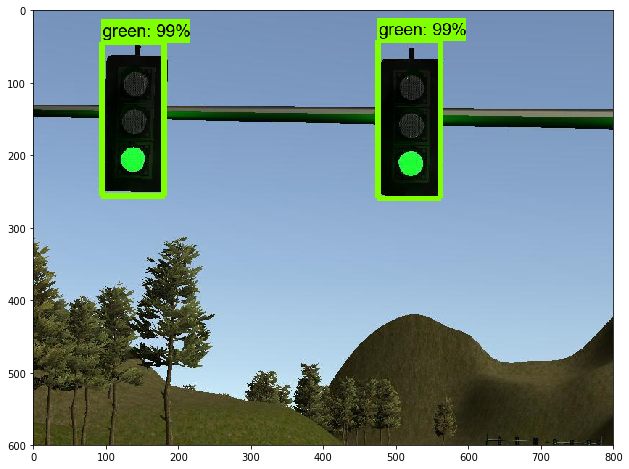

Classes:
[ 1.  1.  3.  3.  2.  1.  3.  1.  2.  2.]
Scores:
[ 0.99669904  0.99089712  0.02694646  0.01216962  0.01142433  0.00406759
  0.00272993  0.00242992  0.00230711  0.00185116]
Boxes:
[[ 0.07072777  0.59487629  0.43232864  0.70316017]
 [ 0.07381405  0.11802341  0.42700315  0.22723483]
 [ 0.07711601  0.12139504  0.41865653  0.2251796 ]
 [ 0.07551099  0.59623539  0.43882471  0.70049274]
 [ 0.13341513  0.91031218  1.          1.        ]
 [ 0.05120051  0.07916716  0.47552174  0.23591229]
 [ 0.23555067  0.91021514  1.          0.99833632]
 [ 0.0899954   0.56164944  0.44117588  0.73639607]
 [ 0.22729702  0.99951833  0.71345824  1.        ]
 [ 0.63607657  0.25639296  1.          0.6483438 ]]
Time in milliseconds 15.960216522216797


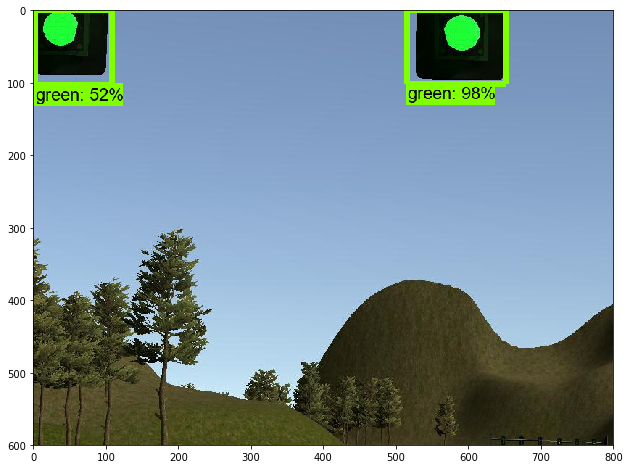

Classes:
[ 1.  1.  1.  1.  2.  1.  1.  2.  1.  1.]
Scores:
[ 0.98164898  0.52590758  0.00612734  0.0059047   0.00562755  0.00321631
  0.00279958  0.00252054  0.00240408  0.00227158]
Boxes:
[[ 0.00162625  0.64468014  0.16834286  0.81609714]
 [ 0.          0.00366018  0.17193507  0.13696977]
 [ 0.02976376  0.01530601  0.77620167  0.09973679]
 [ 0.03627372  0.01182941  0.54105198  0.23962963]
 [ 0.19527417  0.91618866  1.          1.        ]
 [ 0.          0.00409327  0.5639894   0.15690178]
 [ 0.          0.63232791  0.4762885   0.86026847]
 [ 0.45209119  0.41916224  1.          0.93451786]
 [ 0.          0.93094158  0.92618668  1.        ]
 [ 0.02183706  0.66431403  0.15435103  0.7823025 ]]
Time in milliseconds 17.95792579650879


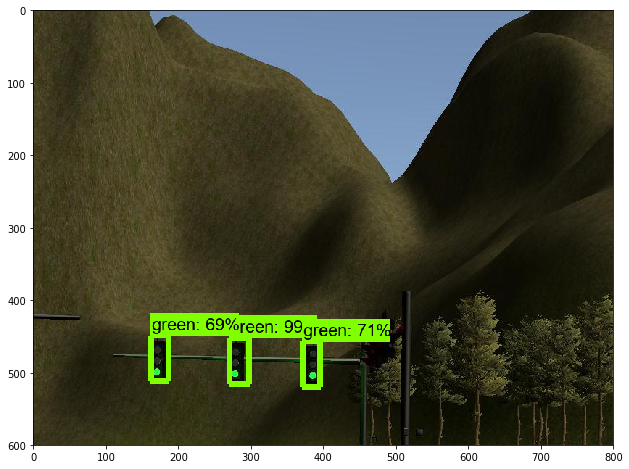

Classes:
[ 1.  1.  1.  1.  2.  3.  2.  1.  2.  2.]
Scores:
[ 0.99825352  0.71555483  0.69037169  0.09448662  0.07780381  0.00424612
  0.00332624  0.00276252  0.00218867  0.00210494]
Boxes:
[[ 0.75383574  0.33824381  0.85846263  0.3730599 ]
 [ 0.76318675  0.46497786  0.86554617  0.49566352]
 [ 0.74838114  0.20315205  0.85294294  0.2347471 ]
 [ 0.74933553  0.19149737  0.85894108  0.22876693]
 [ 0.76318675  0.46497786  0.86554617  0.49566352]
 [ 0.5643388   0.06385335  0.9008069   0.2463719 ]
 [ 0.74838114  0.20315205  0.85294294  0.2347471 ]
 [ 0.76351517  0.47936198  0.87499839  0.50362712]
 [ 0.75383574  0.33824381  0.85846263  0.3730599 ]
 [ 0.16782299  0.99573892  0.66972947  1.        ]]
Time in milliseconds 17.14158058166504


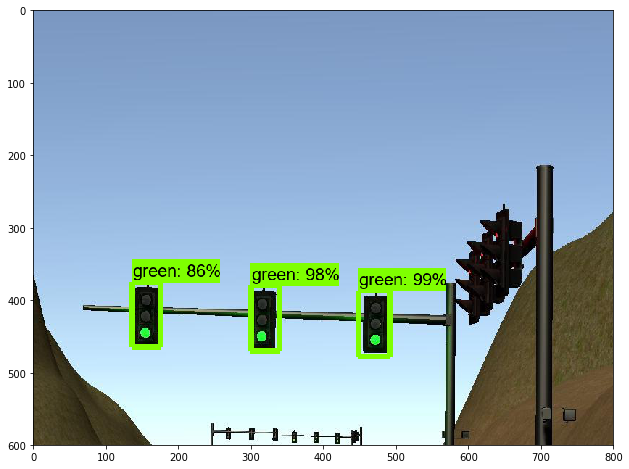

Classes:
[ 1.  1.  1.  2.  2.  3.  3.  2.  2.  2.]
Scores:
[ 0.99458402  0.98479581  0.86010516  0.00967951  0.00413921  0.00391405
  0.00383909  0.00379056  0.0033445   0.00263573]
Boxes:
[[ 0.64566821  0.56071115  0.79631048  0.61544764]
 [ 0.63465101  0.37553886  0.78254646  0.42582622]
 [ 0.62653583  0.1709217   0.77408391  0.22030841]
 [ 0.64566821  0.56071115  0.79631048  0.61544764]
 [ 0.63465101  0.37553886  0.78254646  0.42582622]
 [ 0.2442652   0.91443342  1.          0.98982209]
 [ 0.01438951  0.9198423   0.88459682  0.99815899]
 [ 0.62653583  0.1709217   0.77408391  0.22030841]
 [ 0.          0.15255922  0.38522726  0.77483815]
 [ 0.61737144  0.34293795  1.          0.72777438]]
Time in milliseconds 16.963720321655273


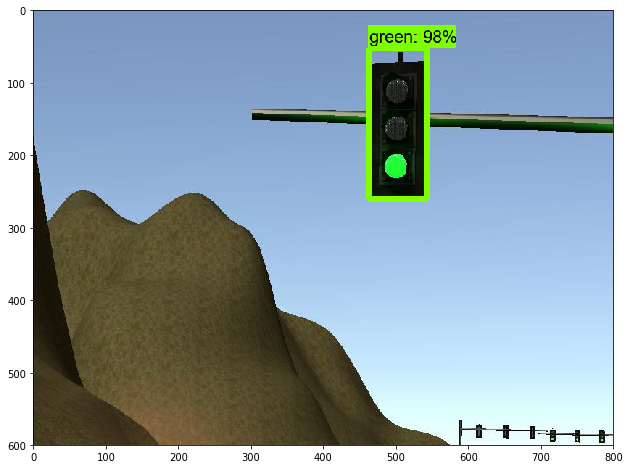

Classes:
[ 1.  2.  3.  3.  1.  1.  3.  2.  1.  2.]
Scores:
[ 0.98772651  0.13862954  0.01988364  0.01386751  0.00415132  0.00312088
  0.00306678  0.00293267  0.00285462  0.00265908]
Boxes:
[[ 0.08785337  0.578421    0.43337971  0.68014538]
 [ 0.21094379  0.90840888  1.          0.99900484]
 [ 0.09222926  0.57713711  0.43231571  0.67862666]
 [ 0.12425476  0.          0.96994191  0.0537778 ]
 [ 0.090578    0.54306054  0.46700197  0.69987559]
 [ 0.06921795  0.01487302  0.9086833   0.08383344]
 [ 0.19734821  0.00851854  0.75500751  0.03093318]
 [ 0.32636574  0.5405457   0.97295177  0.90957272]
 [ 0.12425476  0.          0.96994191  0.0537778 ]
 [ 0.02472851  0.95029616  0.90960956  1.        ]]
Time in milliseconds 16.954898834228516


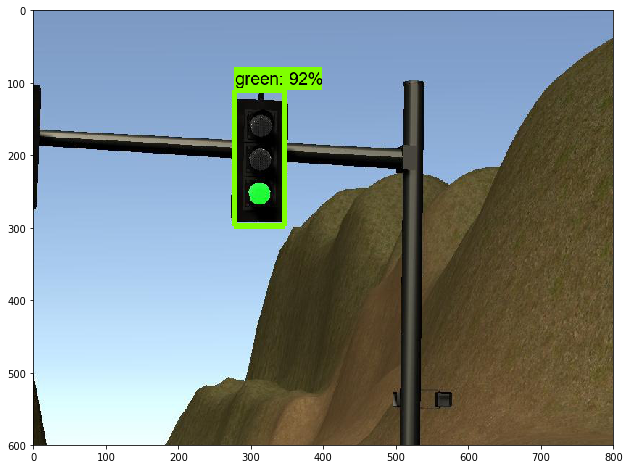

Classes:
[ 1.  3.  3.  3.  3.  3.  1.  1.  2.  2.]
Scores:
[ 0.92216504  0.10324145  0.03528664  0.00759714  0.00371292  0.00360061
  0.00195702  0.00182231  0.0014484   0.00124443]
Boxes:
[[ 0.18343042  0.34690708  0.49660307  0.43433583]
 [ 0.1104589   0.00120125  0.49819803  0.00945676]
 [ 0.18343042  0.34690708  0.49660307  0.43433583]
 [ 0.22649761  0.          0.48084807  0.00465739]
 [ 0.78013939  0.          1.          0.00547669]
 [ 0.11980776  0.00338388  0.47113156  0.02176024]
 [ 0.29331148  0.28272617  0.47350127  0.50548255]
 [ 0.31874484  0.35724249  0.47665322  0.43340144]
 [ 0.1104589   0.00120125  0.49819803  0.00945676]
 [ 0.32997921  0.03154846  0.88321674  0.40068436]]
Time in milliseconds 16.954898834228516


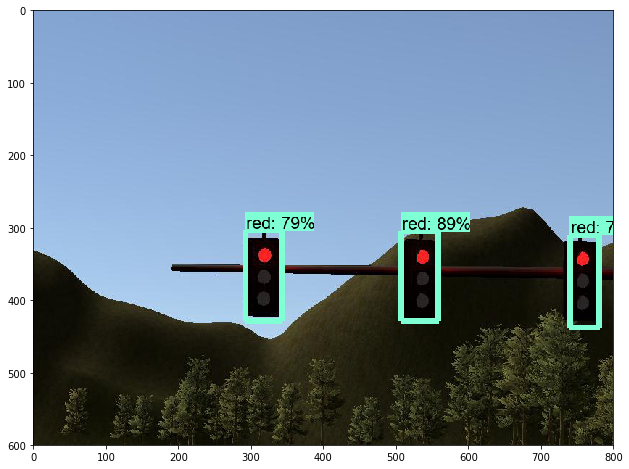

Classes:
[ 3.  3.  3.  3.  2.  3.  3.  3.  2.  3.]
Scores:
[ 0.89392424  0.79646468  0.72514337  0.02162978  0.00652762  0.00504263
  0.00437919  0.00325626  0.00285124  0.00279829]
Boxes:
[[ 0.50872004  0.63484913  0.71363354  0.69886488]
 [ 0.50804579  0.366041    0.71416104  0.42937183]
 [ 0.5174256   0.92569792  0.72930473  0.9774332 ]
 [ 0.          0.93218523  0.77434909  1.        ]
 [ 0.74601829  0.99002147  0.92482197  0.99800563]
 [ 0.4444389   0.03018346  1.          0.22745654]
 [ 0.71213061  0.02341104  0.96512586  0.25355187]
 [ 0.62945884  0.04795154  0.94153947  0.23522782]
 [ 0.          0.93218523  0.77434909  1.        ]
 [ 0.53206795  0.3101244   0.67823094  0.49213123]]
Time in milliseconds 16.954898834228516


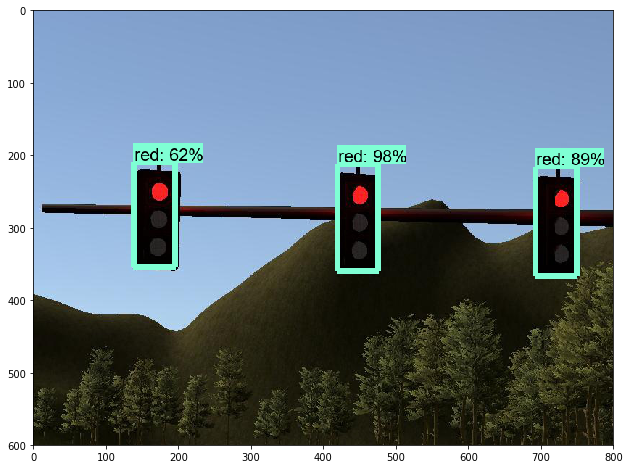

Classes:
[ 3.  3.  3.  3.  2.  2.  1.  2.  2.  2.]
Scores:
[ 0.98082411  0.8933959   0.62493986  0.00558629  0.00354421  0.00351628
  0.00129701  0.00103916  0.00103004  0.00102511]
Boxes:
[[ 0.35483724  0.52415186  0.59954488  0.59580284]
 [ 0.36162543  0.86609     0.61030167  0.93750685]
 [ 0.3500939   0.17372051  0.59079683  0.24546686]
 [ 0.03681436  0.92645866  0.75709796  1.        ]
 [ 0.6713782   0.99587119  1.          0.99946201]
 [ 0.57154006  0.99496514  0.96631116  0.99936265]
 [ 0.36162543  0.86609     0.61030167  0.93750685]
 [ 0.63229811  0.58019012  1.          0.97189528]
 [ 0.12020284  0.44711012  1.          1.        ]
 [ 0.3983497   0.30920598  1.          0.9904995 ]]
Time in milliseconds 15.956878662109375


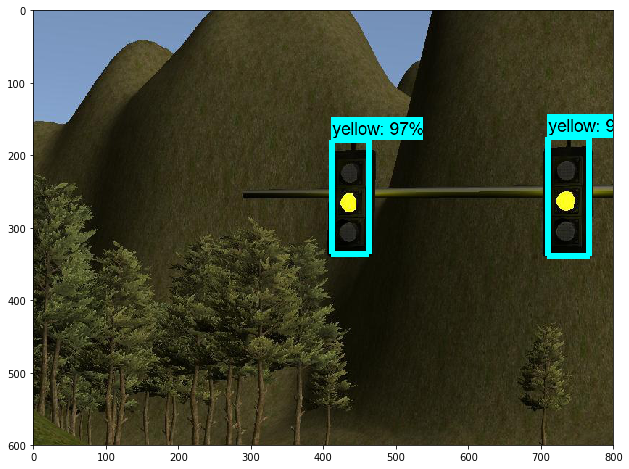

Classes:
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
Scores:
[ 0.98439664  0.97562408  0.01579733  0.00409858  0.00380578  0.00176524
  0.00166642  0.00138744  0.00132878  0.00131047]
Boxes:
[[ 0.29281235  0.88628519  0.56476182  0.95923865]
 [ 0.29843158  0.51469618  0.56008613  0.57967752]
 [ 0.3351213   0.90847695  1.          0.99898636]
 [ 0.42455405  0.99781591  0.93053359  1.        ]
 [ 0.3245616   0.88869476  0.53690463  0.94474888]
 [ 0.70699251  0.99818307  1.          1.        ]
 [ 0.15669537  0.56683004  0.84914148  0.82503295]
 [ 0.45794868  0.99915278  1.          1.        ]
 [ 0.77657861  0.99697274  1.          1.        ]
 [ 0.63846004  0.00277301  1.          0.0062502 ]]
Time in milliseconds 16.954421997070312


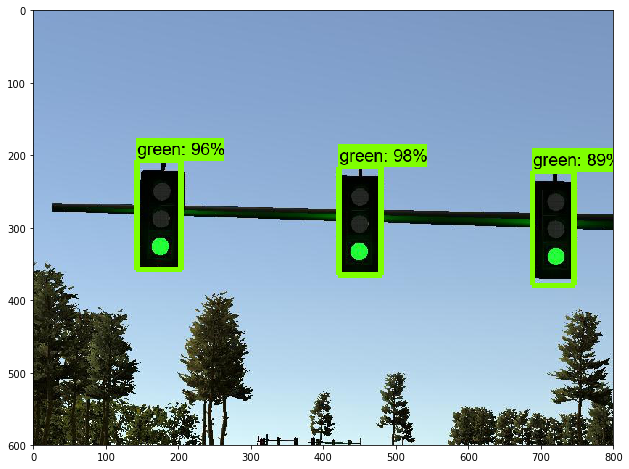

Classes:
[ 1.  1.  1.  3.  3.  1.  2.  2.  3.  2.]
Scores:
[ 0.98290032  0.96745336  0.89209223  0.00319981  0.00281371  0.00247077
  0.00238752  0.00215343  0.00182625  0.00151179]
Boxes:
[[ 0.361128    0.52731079  0.60953641  0.60106426]
 [ 0.34644037  0.17853005  0.59638512  0.25580835]
 [ 0.37031108  0.86056     0.63268536  0.93318981]
 [ 0.361128    0.52731079  0.60953641  0.60106426]
 [ 0.03145581  0.9252125   0.75976861  1.        ]
 [ 0.47218201  0.5345884   0.61032528  0.59508044]
 [ 0.77433157  0.99078941  1.          0.99459767]
 [ 0.72798526  0.99116647  0.99536788  0.9959718 ]
 [ 0.5650481   0.0546917   0.90701687  0.23923469]
 [ 0.61673391  0.98721015  1.          0.99317205]]
Time in milliseconds 16.956806182861328


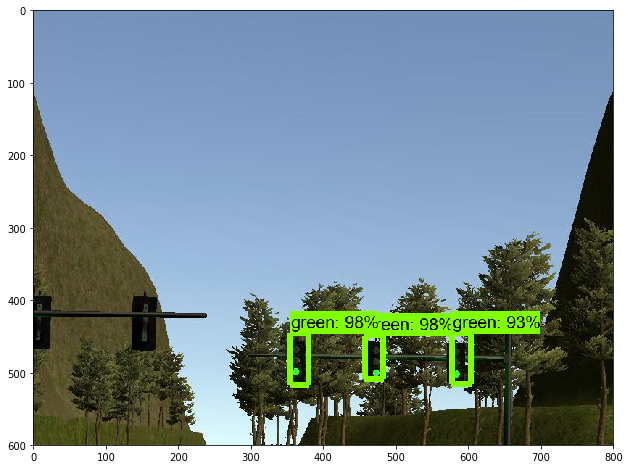

Classes:
[ 1.  1.  1.  3.  3.  2.  3.  2.  2.  2.]
Scores:
[ 0.98390794  0.9823941   0.93214542  0.45339116  0.02334277  0.0149724
  0.01438298  0.00816069  0.00730754  0.00692316]
Boxes:
[[ 0.74945933  0.57223338  0.84817582  0.60448724]
 [ 0.74496496  0.44321671  0.86009109  0.47539523]
 [ 0.74448848  0.72233188  0.85958838  0.75504601]
 [ 0.63135898  0.00325943  0.78696287  0.02670533]
 [ 0.76656318  0.99235719  1.          1.        ]
 [ 0.74496496  0.44321671  0.86009109  0.47539523]
 [ 0.72164583  0.99716544  1.          1.        ]
 [ 0.72164583  0.99716544  1.          1.        ]
 [ 0.20399697  0.985874    0.59747946  0.99879056]
 [ 0.76656318  0.99235719  1.          1.        ]]
Time in milliseconds 17.95053482055664


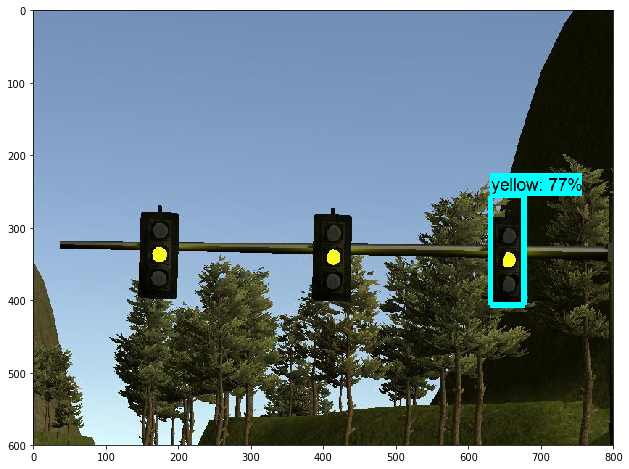

Classes:
[ 2.  2.  2.  2.  3.  3.  3.  2.  3.  3.]
Scores:
[ 0.77444702  0.41886511  0.33764109  0.14238499  0.07796717  0.06291871
  0.0286976   0.01731904  0.01461988  0.00983643]
Boxes:
[[ 0.42690298  0.78864789  0.67685628  0.84745169]
 [ 0.44074461  0.20011309  0.65883482  0.2557033 ]
 [ 0.44782239  0.48782006  0.67170173  0.55267322]
 [ 0.44190377  0.1782154   0.66035777  0.24194105]
 [ 0.          0.8843537   0.85313034  1.        ]
 [ 0.44074461  0.20011309  0.65883482  0.2557033 ]
 [ 0.44782239  0.48782006  0.67170173  0.55267322]
 [ 0.3583439   0.9979974   0.76455015  1.        ]
 [ 0.3583439   0.9979974   0.76455015  1.        ]
 [ 0.00126386  0.86361182  0.38075307  0.99802899]]
Time in milliseconds 19.944190979003906


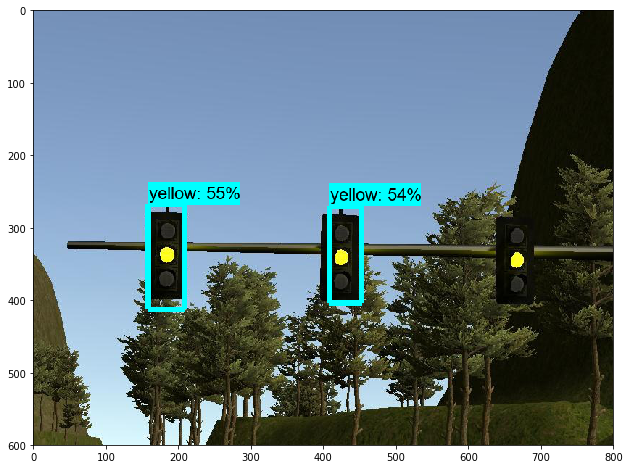

Classes:
[ 2.  2.  2.  3.  3.  3.  2.  3.  3.  2.]
Scores:
[ 0.55178285  0.54360592  0.42860687  0.04955645  0.02664174  0.0087419
  0.00739481  0.00650691  0.0056722   0.00345009]
Boxes:
[[ 0.44830015  0.19755447  0.68680656  0.26208213]
 [ 0.45145506  0.51029557  0.67261022  0.56738943]
 [ 0.43541625  0.80783337  0.67700863  0.86042446]
 [ 0.45145506  0.51029557  0.67261022  0.56738943]
 [ 0.          0.88284016  0.7979483   0.99860358]
 [ 0.          0.86771536  0.41446915  0.99450469]
 [ 0.47537968  0.43844709  0.63782877  0.65456152]
 [ 0.44767475  0.19867989  0.66874826  0.26111361]
 [ 0.46031928  0.80673569  0.69451118  0.85754186]
 [ 0.47171721  0.13697807  0.63019365  0.33576107]]
Time in milliseconds 16.95394515991211


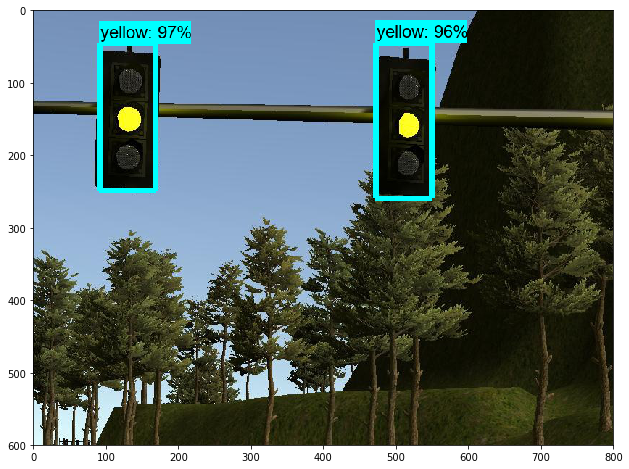

Classes:
[ 2.  2.  2.  3.  3.  2.  3.  2.  3.  2.]
Scores:
[ 0.97920185  0.96385908  0.00905322  0.00649094  0.00616081  0.00606766
  0.00517153  0.00431132  0.00409997  0.00364718]
Boxes:
[[ 0.07782342  0.11387078  0.41426897  0.2116489 ]
 [ 0.07539774  0.59122896  0.43306565  0.68850541]
 [ 0.29680735  0.99576133  0.74603659  1.        ]
 [ 0.55637211  0.97649068  1.          0.99886328]
 [ 0.70947659  0.989856    1.          1.        ]
 [ 0.50877887  0.99346173  0.9673261   0.99968052]
 [ 0.07721193  0.11254185  0.41624117  0.21446973]
 [ 0.40260047  0.99253833  0.84504277  0.99789536]
 [ 0.816374    0.          0.90521747  0.00467628]
 [ 0.70947659  0.989856    1.          1.        ]]
Time in milliseconds 21.42643928527832


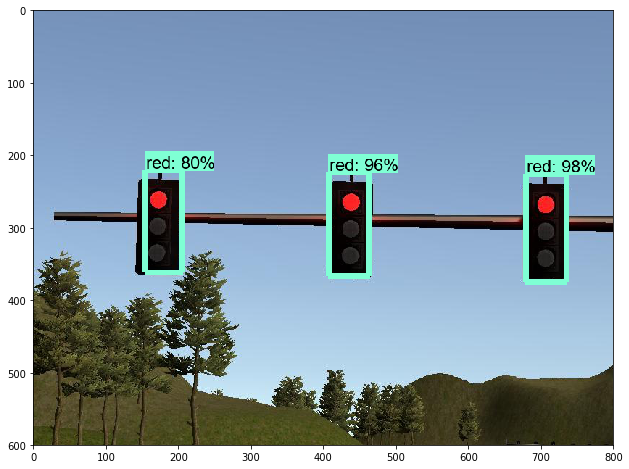

Classes:
[ 3.  3.  3.  3.  2.  2.  3.  3.  2.  2.]
Scores:
[ 0.98018205  0.96689147  0.80513841  0.00369684  0.00249858  0.00177432
  0.00165674  0.001564    0.00153723  0.00133075]
Boxes:
[[ 0.37745777  0.84884852  0.62465543  0.9204666 ]
 [ 0.37439486  0.50885361  0.61131924  0.58069748]
 [ 0.3690353   0.19320023  0.60306972  0.25797158]
 [ 0.02833807  0.9289459   0.77699214  1.        ]
 [ 0.31950471  0.9108727   1.          0.9895581 ]
 [ 0.3690353   0.19320023  0.60306972  0.25797158]
 [ 0.31950471  0.9108727   1.          0.9895581 ]
 [ 0.40677154  0.1859083   0.60389674  0.24086548]
 [ 0.37926939  0.34869251  0.93827868  0.65428662]
 [ 0.43684539  0.2729668   0.97950554  0.73352832]]
Time in milliseconds 16.95418357849121


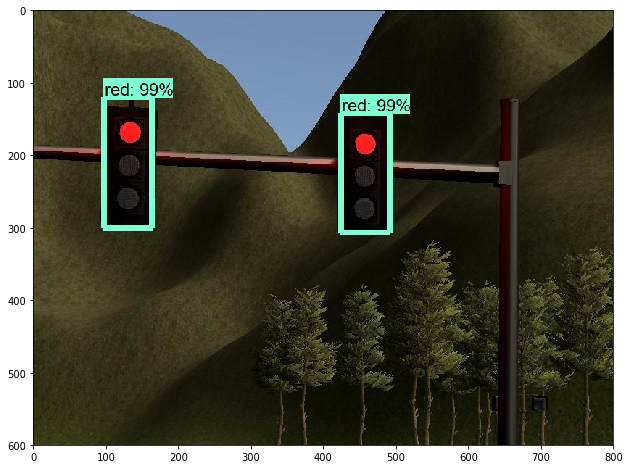

Classes:
[ 3.  3.  2.  2.  2.  2.  3.  3.  1.  2.]
Scores:
[ 0.99282771  0.99163014  0.00419559  0.00402335  0.00319662  0.00223364
  0.00217111  0.00205793  0.00136197  0.00135425]
Boxes:
[[ 0.20079884  0.12219493  0.50089264  0.20525576]
 [ 0.23698232  0.53044498  0.5102756   0.61514771]
 [ 0.53483516  0.99737501  0.85387546  1.        ]
 [ 0.44729137  0.99843216  0.86165893  1.        ]
 [ 0.76473576  0.99835289  0.94773942  1.        ]
 [ 0.75513834  0.99396461  1.          0.99848229]
 [ 0.36205241  0.53029323  0.50996161  0.60135877]
 [ 0.          0.93356144  1.          0.99679804]
 [ 0.          0.27821606  1.          0.71437049]
 [ 0.02905494  0.0395937   0.97878188  0.54763937]]
Time in milliseconds 26.927471160888672


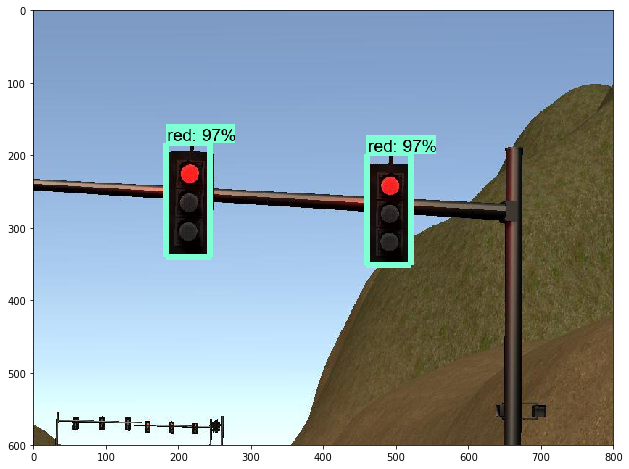

Classes:
[ 3.  3.  2.  3.  3.  2.  2.  1.  3.  3.]
Scores:
[ 0.9750104   0.97007668  0.01465617  0.00903698  0.00766344  0.00258655
  0.00229591  0.00221891  0.0019547   0.00171977]
Boxes:
[[ 0.33077824  0.57563156  0.58577561  0.65184861]
 [ 0.30637798  0.2288447   0.56713247  0.30576104]
 [ 0.4017669   0.09591126  0.96742439  0.49088025]
 [ 0.33796677  0.70381296  0.97393739  0.84525979]
 [ 0.12458771  0.92822975  1.          1.        ]
 [ 0.33077824  0.57563156  0.58577561  0.65184861]
 [ 0.54240215  0.13083711  1.          0.43140814]
 [ 0.44124243  0.          1.          0.41855896]
 [ 0.33808866  0.          1.          0.48569223]
 [ 0.38033223  0.57869565  0.55058628  0.64042974]]
Time in milliseconds 19.945859909057617


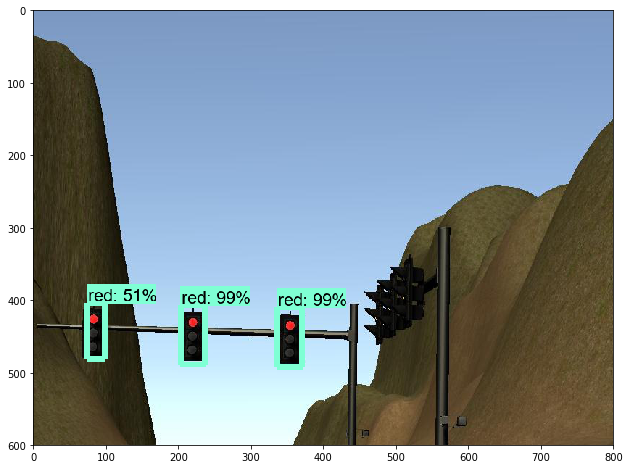

Classes:
[ 3.  3.  3.  3.  2.  1.  1.  2.  2.  3.]
Scores:
[ 0.99831992  0.99730456  0.51272893  0.00318135  0.00281257  0.00267718
  0.00259086  0.0021769   0.00155034  0.00131277]
Boxes:
[[ 0.68480045  0.42024261  0.81962448  0.4639985 ]
 [ 0.67881727  0.25487357  0.8146044   0.29720068]
 [ 0.67349416  0.09271257  0.80155998  0.12395898]
 [ 0.67086309  0.02434359  1.          0.24793638]
 [ 0.          0.15730909  0.39166766  0.78313601]
 [ 0.          0.          0.88011789  0.11730945]
 [ 0.          0.          0.79595125  0.27415761]
 [ 0.          0.9365446   0.90172148  1.        ]
 [ 0.67086309  0.02434359  1.          0.24793638]
 [ 0.          0.13844308  0.40626478  0.87893009]]
Time in milliseconds 16.042232513427734


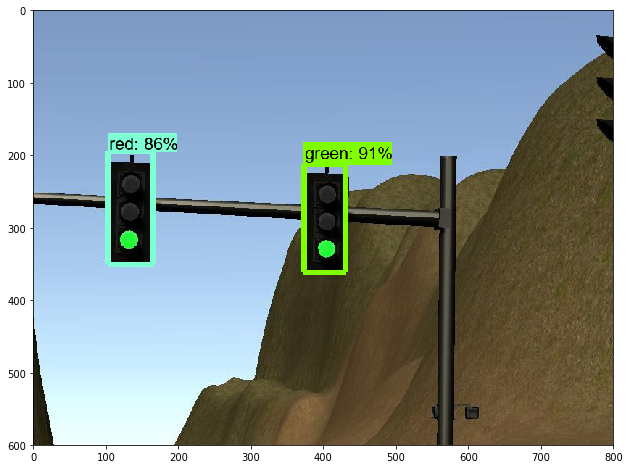

Classes:
[ 1.  3.  1.  2.  3.  2.  2.  3.  2.  2.]
Scores:
[ 0.91557741  0.86078095  0.08250892  0.01961411  0.01893572  0.01862949
  0.00974318  0.00911812  0.0045558   0.00263031]
Boxes:
[[ 0.35632062  0.46714067  0.60320586  0.53978634]
 [ 0.32589975  0.12968174  0.58340156  0.20767888]
 [ 0.32589975  0.12968174  0.58340156  0.20767888]
 [ 0.22317243  0.99349988  0.40771037  1.        ]
 [ 0.35632062  0.46714067  0.60320586  0.53978634]
 [ 0.          0.99425763  0.29731554  1.        ]
 [ 0.12298816  0.99036956  0.29174283  1.        ]
 [ 0.          0.99425763  0.29731554  1.        ]
 [ 0.00128159  0.97309113  0.34155732  1.        ]
 [ 0.32377958  0.70708108  0.53711188  0.73364353]]
Time in milliseconds 16.939401626586914


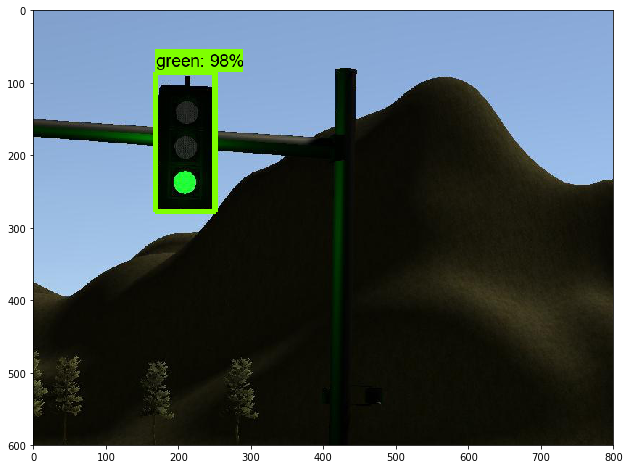

Classes:
[ 1.  3.  2.  3.  3.  3.  3.  3.  3.  3.]
Scores:
[ 0.98279923  0.12823138  0.01155838  0.01106006  0.00716768  0.00519074
  0.00437662  0.00396273  0.00390879  0.00337504]
Boxes:
[[ 0.14313991  0.21039763  0.46271795  0.31452379]
 [ 0.24392435  0.90020454  1.          0.99837756]
 [ 0.11963186  0.52093798  0.3157779   0.56299144]
 [ 0.30046129  0.99624252  0.73809123  1.        ]
 [ 0.6737451   0.86502647  0.98683864  0.99476755]
 [ 0.14825594  0.20974776  0.4674508   0.31526449]
 [ 0.0312151   0.56886119  0.87564087  0.82922834]
 [ 0.20413539  0.75523001  0.99619246  0.96943349]
 [ 0.00363863  0.90521175  0.82680631  0.99416274]
 [ 0.42834941  0.0396386   0.98262584  0.22957137]]
Time in milliseconds 17.95172691345215


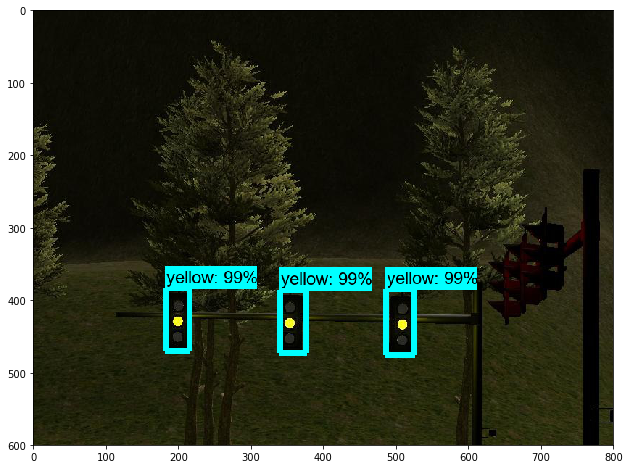

Classes:
[ 2.  2.  2.  3.  2.  2.  3.  3.  3.  2.]
Scores:
[ 0.9964959   0.99466729  0.99447352  0.01573891  0.01365698  0.01265028
  0.01206631  0.00708206  0.00490072  0.00444376]
Boxes:
[[ 0.64472359  0.4254123   0.78814608  0.47138274]
 [ 0.64224845  0.6084069   0.79233831  0.65859807]
 [ 0.64147532  0.22832324  0.782902    0.27118304]
 [ 0.64147532  0.22832324  0.782902    0.27118304]
 [ 0.34163773  0.9607991   0.53494924  0.97930968]
 [ 0.71866751  0.96866345  1.          0.97986281]
 [ 0.64224845  0.6084069   0.79233831  0.65859807]
 [ 0.64472359  0.4254123   0.78814608  0.47138274]
 [ 0.          0.0408119   0.5300197   0.22337535]
 [ 0.63016224  0.97344601  1.          0.98220086]]
Time in milliseconds 18.68414878845215


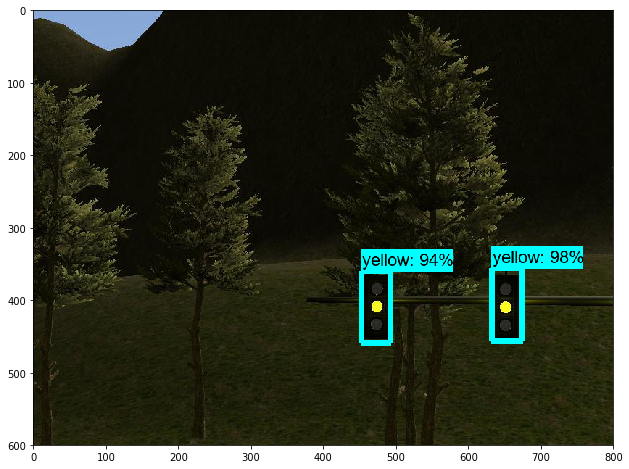

Classes:
[ 2.  2.  3.  3.  2.  3.  3.  3.  3.  2.]
Scores:
[ 0.98870498  0.94034088  0.01740893  0.0126301   0.00959661  0.00556196
  0.00364797  0.00361635  0.00333744  0.00296286]
Boxes:
[[ 0.59438044  0.7909165   0.76060647  0.84414309]
 [ 0.60064393  0.56554073  0.76338261  0.61732739]
 [ 0.          0.89409345  0.89192075  0.99000257]
 [ 0.59438044  0.7909165   0.76060647  0.84414309]
 [ 0.70762289  0.99805957  1.          1.        ]
 [ 0.          0.77615196  0.75681722  1.        ]
 [ 0.          0.85229051  0.68515539  0.99188137]
 [ 0.36005884  0.99824303  0.89926594  1.        ]
 [ 0.69743049  0.08475611  0.94196212  0.26750785]
 [ 0.63715339  0.99934924  1.          1.        ]]
Time in milliseconds 16.9522762298584


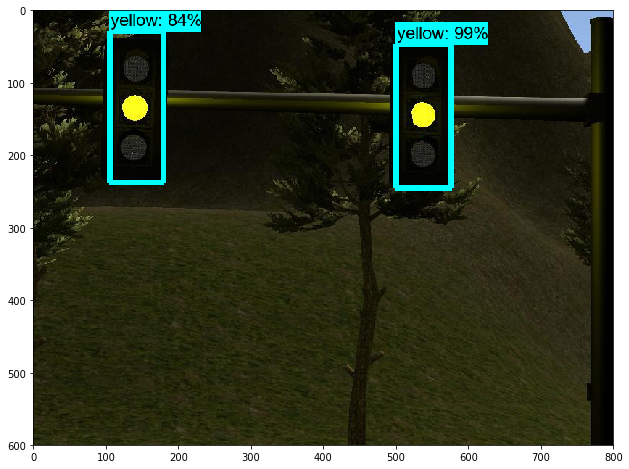

Classes:
[ 2.  2.  3.  2.  3.  3.  3.  2.  2.  3.]
Scores:
[ 0.9918595   0.84612691  0.02849285  0.0134116   0.01034891  0.01004518
  0.00470022  0.00467751  0.00422762  0.00402457]
Boxes:
[[ 0.07909927  0.62589872  0.40710479  0.72242057]
 [ 0.04993507  0.13228808  0.39628363  0.22582962]
 [ 0.          0.98933601  0.36997911  1.        ]
 [ 0.19599101  0.92974603  1.          1.        ]
 [ 0.          0.97507066  0.5463233   0.99515182]
 [ 0.19599101  0.92974603  1.          1.        ]
 [ 0.11099902  0.98996401  0.45702407  1.        ]
 [ 0.          0.96134394  0.93731546  1.        ]
 [ 0.1177235   0.14921162  0.28631213  0.21679702]
 [ 0.24469146  0.55342168  0.9143337   0.8651374 ]]
Time in milliseconds 15.993595123291016


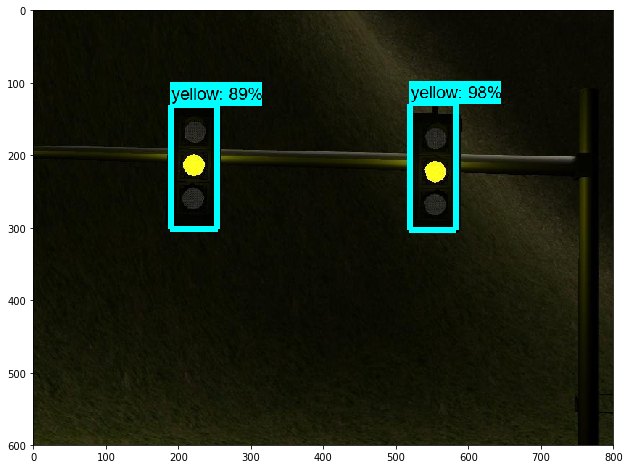

Classes:
[ 2.  2.  2.  2.  2.  3.  2.  2.  3.  2.]
Scores:
[ 0.98867375  0.89913398  0.11189026  0.01785915  0.01581758  0.01005775
  0.00688082  0.00498503  0.00421613  0.00299174]
Boxes:
[[ 0.21629348  0.64948177  0.50509751  0.72975719]
 [ 0.21850367  0.23646551  0.501724    0.31751215]
 [ 0.23468545  0.24390261  0.43942294  0.30904707]
 [ 0.72261643  0.96204603  1.          0.97541475]
 [ 0.12956738  0.95213157  1.          1.        ]
 [ 0.00665283  0.04170769  0.4014183   0.27391636]
 [ 0.78353846  0.95440423  1.          0.97118115]
 [ 0.64500797  0.96974123  1.          0.97998631]
 [ 0.14014813  0.          0.57902658  0.00229028]
 [ 0.55847424  0.97492409  1.          0.98231995]]
Time in milliseconds 16.95561408996582


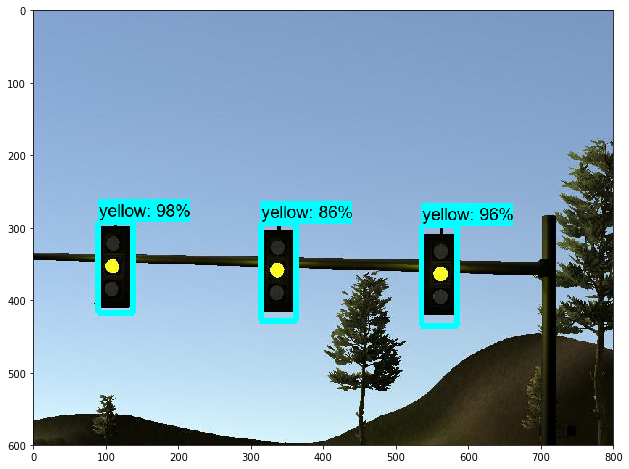

Classes:
[ 2.  2.  2.  3.  3.  2.  2.  2.  3.  2.]
Scores:
[ 0.98357278  0.9600997   0.86900294  0.0584074   0.03305127  0.02990215
  0.02139819  0.01420669  0.01072825  0.0075484 ]
Boxes:
[[ 0.48716077  0.11217815  0.69565183  0.17295632]
 [ 0.49563569  0.66913772  0.72556931  0.73186076]
 [ 0.49114636  0.39225456  0.71460438  0.45393518]
 [ 0.49563569  0.66913772  0.72556931  0.73186076]
 [ 0.48716077  0.11217815  0.69565183  0.17295632]
 [ 0.23291941  0.99459434  0.58680135  1.        ]
 [ 0.40321392  0.99342263  0.82154542  0.99881649]
 [ 0.2929323   0.91999698  1.          0.99446321]
 [ 0.49114636  0.39225456  0.71460438  0.45393518]
 [ 0.2844702   0.99502194  0.75533366  1.        ]]
Time in milliseconds 16.954898834228516


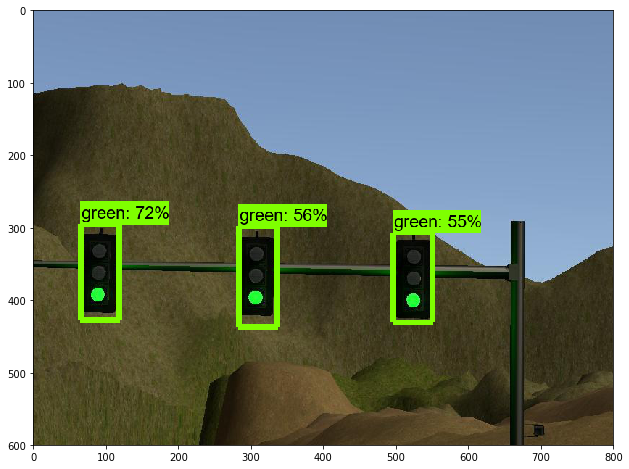

Classes:
[ 1.  1.  1.  2.  2.  3.  2.  3.  1.  3.]
Scores:
[ 0.72066844  0.56878483  0.5529452   0.05107765  0.02442277  0.01210719
  0.00998335  0.00763371  0.00750773  0.00633562]
Boxes:
[[ 0.4927839   0.08212635  0.71269238  0.14981714]
 [ 0.49814916  0.35407668  0.72757208  0.42201716]
 [ 0.51175559  0.62081999  0.71691942  0.68913847]
 [ 0.4927839   0.08212635  0.71269238  0.14981714]
 [ 0.49814916  0.35407668  0.72757208  0.42201716]
 [ 0.4927839   0.08212635  0.71269238  0.14981714]
 [ 0.50464362  0.6229074   0.7303521   0.68341923]
 [ 0.82888538  0.99549764  1.          1.        ]
 [ 0.53010851  0.56449437  0.68447965  0.74893486]
 [ 0.51175559  0.62081999  0.71691942  0.68913847]]
Time in milliseconds 16.956806182861328


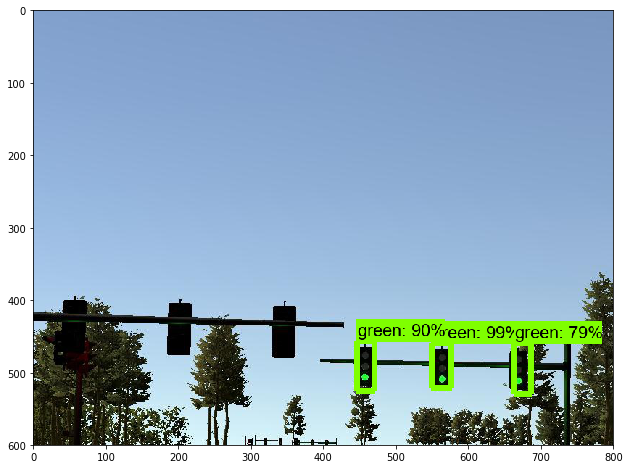

Classes:
[ 1.  1.  1.  2.  2.  2.  3.  2.  3.  1.]
Scores:
[ 0.9986645   0.90278733  0.79514456  0.03175851  0.02598952  0.01235267
  0.01115384  0.00502567  0.00336289  0.00307238]
Boxes:
[[ 0.76778275  0.687316    0.86747009  0.72199768]
 [ 0.76300108  0.55813152  0.87619269  0.58982879]
 [ 0.76806885  0.82980007  0.88320953  0.85935694]
 [ 0.76806885  0.82980007  0.88320953  0.85935694]
 [ 0.76300108  0.55813152  0.87619269  0.58982879]
 [ 0.7502175   0.9173755   0.90960437  0.93769914]
 [ 0.76300108  0.55813152  0.87619269  0.58982879]
 [ 0.76778275  0.687316    0.86747009  0.72199768]
 [ 0.          0.91210234  0.91406202  1.        ]
 [ 0.10928655  0.          0.64333349  0.22104104]]


In [10]:
import time

matplotlib.use('TkAgg')
%matplotlib inline

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            print("Time in milliseconds", (time1 - time0) * 1000) 

            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
              image_np,
              np.squeeze(boxes),
              np.squeeze(classes).astype(np.int32),
              np.squeeze(scores),
              category_index,
              use_normalized_coordinates=True,
              line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            print('Classes:')
            print(classes[0][0:10])
            print('Scores:')
            print(scores[0][0:10])
            print('Boxes:')
            print(boxes[0][0:10])